<a href="https://colab.research.google.com/github/Vanwalleghem/Behavioural-Analysis/blob/main/Kopie_von_Circle_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import csv
import pandas as pd
import scipy
import seaborn as sns
import scipy.stats as st

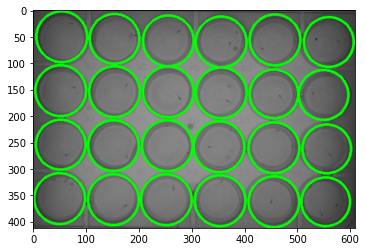

In [ ]:
image=cv2.imread('Circles_22-11-01_4dpf_GF_11.15.png')
# here change to file name of the background image to define the circle for each well
output=image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,
                           minDist=70,
                           dp=1,
                           param1=60,
                           param2=30,
                           minRadius=45,
                           maxRadius=49)
# play around with the min and max radius in case it doesn't find all wells or doesn't look good
circles = np.round(circles[0, :]).astype("int")
for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        
plt.imshow(output)

In [ ]:

# add a new code "circles" and a save directory to save the positions of the circles to know in the text file 
# which data belongs to which well
circles_data=pd.read_csv('Circle_measures_GF11am.csv')
circles=np.zeros((24,3))
circles[:,0]=circles_data['X'].to_numpy(np.float16).astype(int)
circles[:,1]=circles_data['Y'].to_numpy(np.float16).astype(int)
circles[:,2]=circles_data['Width'].to_numpy(np.float16).astype(int)/2
# new codes to use the manually defined circles
# 3 stands for X, Y and radius which is (0,1,2) defined below

In [ ]:
circles

array([[ 55.,  52.,  45.],
       [155.,  54.,  45.],
       [256.,  55.,  45.],
       [358.,  56.,  45.],
       [456.,  59.,  45.],
       [556.,  60.,  45.],
       [ 54., 153.,  45.],
       [154., 154.,  45.],
       [255., 156.,  45.],
       [355., 158.,  45.],
       [455., 159.,  45.],
       [555., 159.,  45.],
       [ 51., 253.,  45.],
       [153., 255.,  45.],
       [254., 256.,  45.],
       [354., 258.,  45.],
       [454., 259.,  45.],
       [554., 259.,  45.],
       [ 51., 354.,  45.],
       [152., 356.,  45.],
       [252., 357.,  45.],
       [353., 358.,  45.],
       [452., 359.,  45.],
       [552., 361.,  45.]])

In [ ]:
data=pd.read_csv('export spots.csv')
# add the spots file here
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,ELLIPSE_Y0,ELLIPSE_MAJOR,ELLIPSE_MINOR,ELLIPSE_THETA,ELLIPSE_ASPECTRATIO,AREA,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX
0,Label,Spot ID,Track ID,Quality,X,Y,Z,T,Frame,Radius,...,Ellipse center y0,Ellipse long axis,Ellipse short axis,Ellipse angle,Ellipse aspect ratio,Area,Perimeter,Circularity,Solidity,Shape index
1,Label,Spot ID,Track ID,Quality,X,Y,Z,T,Frame,R,...,El. y0,El. long axis,El. sh. axis,El. angle,El. a.r.,Area,Perim.,Circ.,Solidity,Shape index
2,NaN,NaN,NaN,(quality),(pixel),(pixel),(pixel),(frame),NaN,(pixel),...,(pixel),(pixel),(pixel),(radians),NaN,(pixel^2),(pixel),NaN,NaN,NaN
3,ID2304,2304,0,15.0,275.6777777777778,40.18888888888889,0.0,0.0,0,2.1850968611841584,...,-0.012134932682386537,3.100471481743598,1.8447741310264842,2.578133804791693,1.680678100152244,15.0,18.18033988749895,0.5702917993605247,0.7894736842105263,4.6941435741782565
4,ID2369,2369,2,9.0,64.56666666666666,318.7,0.0,0.0,0,1.7841241161527712,...,0.18672222104385686,2.5025349750095796,1.7539546140851947,2.090458687803018,1.426795741983791,10.0,14.313755207963359,0.613341982518604,0.8333333333333334,4.526406832726132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36758,ID40491,40491,19.0,17.0,77.294118,280.647059,0.0,1528.0,1528,2.326213,...,-0.074919,5.325716,1.471769,1.797105,3.618581,17.0,22.093369,0.437658,0.971429,5.358429
36759,ID40495,40495,7.0,17.0,267.1,336.62381,0.0,1528.0,1528,2.360174,...,-0.293669,4.179907,2.235159,1.8235,1.870071,17.5,20.303088,0.533487,1.0,4.853366
36760,ID40499,40499,2.0,13.0,62.876812,346.210145,0.0,1528.0,1528,1.91326,...,0.337605,3.631354,1.644246,3.018734,2.208522,11.5,16.969112,0.501868,0.92,5.003918
36761,ID40437,40437,3.0,14.0,177.861111,43.944444,0.0,1528.0,1528,1.95441,...,-0.16713,3.059298,1.504085,1.304764,2.033993,12.0,14.892922,0.679878,1.0,4.299216


In [ ]:
# for track speed
x_position=data[['POSITION_X','POSITION_Y','FRAME','TRACK_ID']][3:]
positions=x_position.to_numpy(np.float16).astype(int)
positions=positions[positions[:,2].argsort()]
dist = scipy.spatial.distance_matrix(positions[:,0:2],circles[:,0:2],2)
wells=dist<circles[:,2]+1
well_id=np.argmax(wells,axis=1)
wells_dist=dist[wells]

(1530, 4)
(1528,)


In [ ]:
#save the distance and speed data in a dictionnary
distance_speed_data=dict()
fps=50;
pixelSize=183.8235; #microns per pixel
for well_nb in range(0,24):
  well_positions=positions[np.where(well_id[np.any(wells,axis=1)]==well_nb)] #grab the positions for that well
  distance_travelled=[]
  for TRACK_ID in range(0,np.unique(well_positions[:,3]).max()+1):  
    track_positions=well_positions[np.where(well_positions[:,3]==TRACK_ID)] #grab the positions for each track (to avoid duplicates)
    if len(track_positions)>50: #Discards short tracks that are likely to be artefacts.
      distance_travelled=np.append(distance_travelled,np.hypot(np.diff(track_positions[:,0]),np.diff(track_positions[:,1]))*pixelSize/1000) #hypothenus of the displacement in x and y, in mm (microns divided by 1000)
      #concatenate the distance travelled for each track as they are in one well and are all one fish
  distance_speed_data['DistanceTravelled_well_'+str(well_nb)]=distance_travelled #All the data will be saved in a dictionnary    
  distance_speed_data['TotalDistanceTravelled_well_'+str(well_nb)]=np.sum(distance_travelled)
  distance_speed_data['Speed_well_'+str(well_nb)]=distance_travelled*fps #speed is in mm/s
  distance_speed_data['AverageSpeed_well_'+str(well_nb)]=np.mean(distance_speed_data['Speed_well_'+str(well_nb)])
  


In [ ]:
#save the whole dictionnary, and the total distance and mean speed per well for outside processing
np.save('GF11AM_speedAndDistance.npy',distance_speed_data)
distance_speed_export=np.empty((2,24))
distance_speed_export[:]=np.nan
for well_nb in range(0,24):
  distance_speed_export[0,well_nb]=distance_speed_data['TotalDistanceTravelled_well_'+str(well_nb)]
  distance_speed_export[1,well_nb]=distance_speed_data['AverageSpeed_well_'+str(well_nb)]

np.savetxt('distance_speed_export_GF11AM.txt',distance_speed_export,fmt='%f')

In [ ]:
x_position=data[['POSITION_X','POSITION_Y']][3:]
positions=x_position.to_numpy(np.float16).astype(int)
dist = scipy.spatial.distance_matrix(positions,circles[:,0:2],2)
wells=dist<circles[:,2]+1
well_id=np.argmax(wells,axis=1)
wells_dist=dist[wells]
# this is to only take the data of the X and Y row 
# and to make a matrix and to find the centre of each well, and look at the distance each spot has to the closest centre which 
# equals to the centre of the well he belongs to

In [ ]:
# changed from divided by 2 to divided by root of 2, to actually have equal area sizes
well_counts=np.zeros((2,24))
for well_nb in range(0,24):    
    temp=wells_dist[np.where(well_id[np.any(wells,axis=1)]==well_nb)]
    well_counts[0,well_nb]=np.count_nonzero(temp<=circles[well_nb,2]/2**0.5)
    well_counts[1,well_nb]=np.count_nonzero(temp>circles[well_nb,2]/2**0.5)
# to find the total number of counts per circle and then the divide into nr of spots within a distance of 1/2 of the radius 
# or above = in inner or outer area

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# important for saving, to connect with Google drive

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


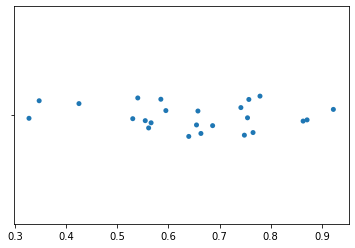

In [ ]:
well_proba=well_counts/np.sum(well_counts,axis=0)
sns.stripplot(well_proba[0,:])
np.savetxt('./drive/MyDrive/Colab Notebooks/Manually22-11-01_4dpf_GF3pm_counts.txt',well_counts,fmt='%f')
np.savetxt('./drive/MyDrive/Colab Notebooks/Manually22-11-01_4dpf_GF3pm_probability.txt',well_proba,fmt='%f')
np.savetxt('./drive/MyDrive/Colab Notebooks/Manually22-11-01_4dpf_GF3pm_circles.txt',circles,fmt='%f')
# to make the nr of spots divided by total nr, so to make relative value/percentage
# to save the files into my drive folder
# the graph shows the percentage of spots in inner area for each well


In [ ]:
HistCount=np.zeros((420,620))
for (x,y) in positions:
    HistCount[y,x]=HistCount[y,x]+1

<function matplotlib.pyplot.show(*args, **kw)>

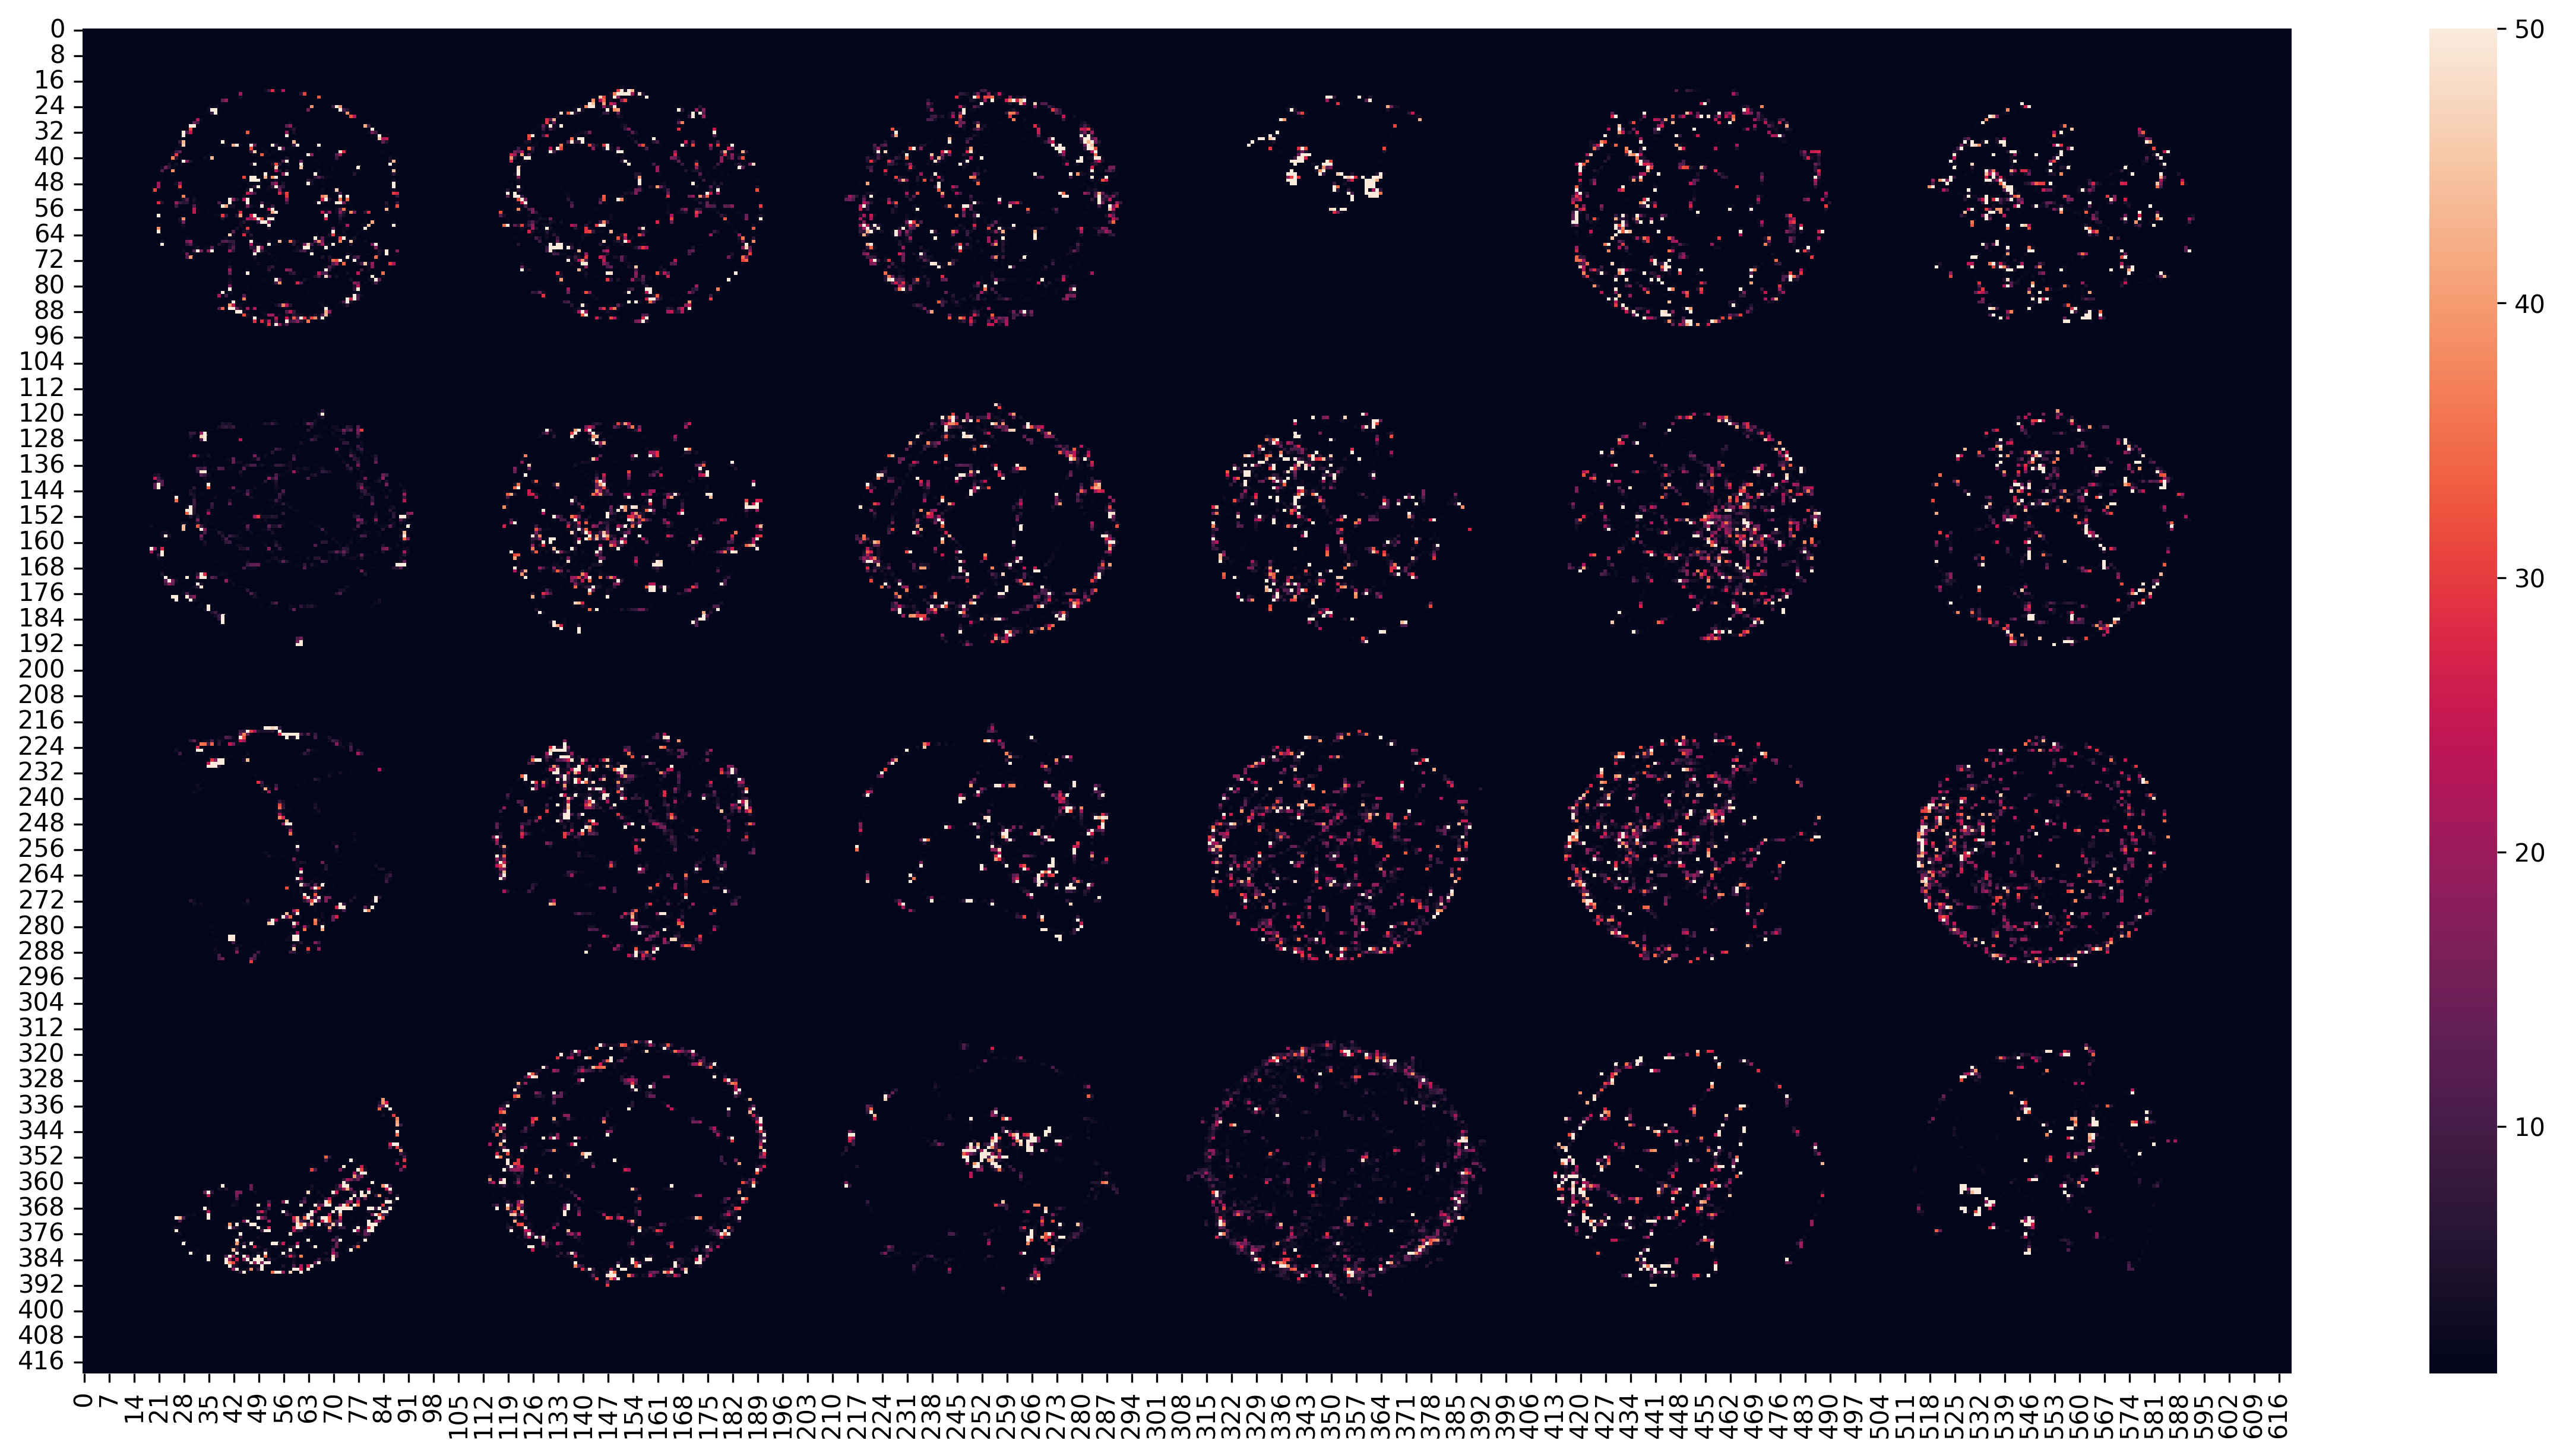

In [ ]:
plt.figure(figsize=(20, 10), dpi=300)
sns.heatmap(HistCount,vmin=1,vmax=50)
plt.savefig('./drive/MyDrive/Colab Notebooks/Manually22-11-01_4dpf_GF3pm_HistCount.png',dpi=300)
plt.show
# showing the Counts

In [ ]:
positions[:,0].max()
# X is the long axis, the 0

649

In [ ]:
positions[:,0]=positions[:,0]-10
positions[:,1]=positions[:,1]-10
# doesn't has to be run, it adjusts the spots instead of the squares, so easier but changes data therefore a little less nice

In [ ]:
kde_img=np.zeros((600,400))
for x_nb in range(0,6):
    for y_nb in range(0,4):
        xmin=(x_nb)*100
        xmax=(x_nb+1)*100
        ymin=(y_nb)*100
        ymax=(y_nb+1)*100
# will divide the pic into squares of 100 x 100, if the wells are shifted (look at X and Y axis) then adjust xmin and xmax 
# by how much it is shifted, e.g. put xmin=-20(x..), adjusts for all squares
        x=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),0]
        y=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),1]
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions_kde = np.vstack([xx.ravel(), yy.ravel()])
        if (len(x)>50 and x.std()>0.1):
        # the and x.std... added to define that stanard deviation has to be above zero, because wells without any counts 
        # (no fish inside) where causing errors
            values = np.vstack([x, y])
            kernel = st.gaussian_kde(values)
            f = np.reshape(kernel(positions_kde).T, xx.shape)
            kde_img[xmin:xmax,ymin:ymax]=f/f.max()

In [ ]:
len(x)>50 and x.std()>0.1

True

<function matplotlib.pyplot.show(*args, **kw)>

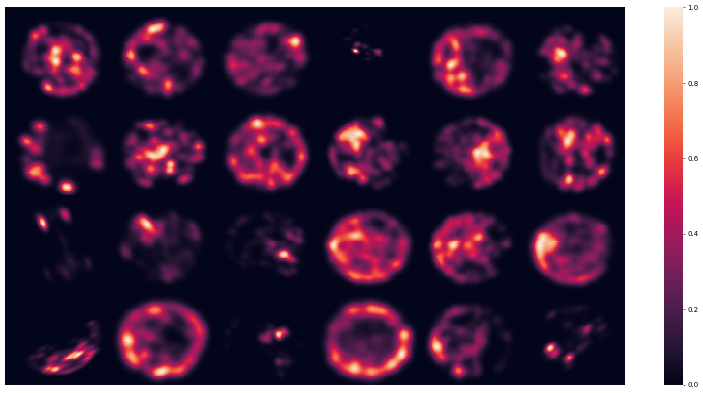

In [ ]:
plt.figure(figsize=(20, 10), dpi=50)
sns.heatmap(np.transpose(kde_img),xticklabels= False , yticklabels= False)
plt.savefig('./drive/MyDrive/Colab Notebooks/Manually22-11-01_4dpf_GF3pm_heatmap.png',dpi=300)
plt.show
# after adjusting above, run this to create and save the pic below 
# don't forget to change the file name to be saved before running

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# to make the graphs directly show up in here


In [ ]:
# everyting in one line in the other code
# to load data
Probability2510 = pd.read_csv ('22-10-25_4dpf_wt11am_probability.txt', sep=' ', header=None, dtype=np.float32)
Probability2510 = Probability2510.transpose()

# ' let it know that it's a string of characters
Probability2510.head ()

,0,1
0,0.169645,0.830355
1,0.342375,0.657625
2,0.336995,0.663005
3,0.169234,0.830766
4,0.409363,0.590637


In [ ]:
# copy this for each file you want to look at
Probability2510 = pd.read_csv ('Manually22-10-25_4dpf_3pm_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner WT1',1:'outer WT1'})
Probability0111 = pd.read_csv ('Manually22-11-01_4dpf_GF3pm_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner GF',1:'outer GF'})
Probability151101 = pd.read_csv ('Manually22-11-15_4dpf_3pm-1_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner WT2',1:'outer WT2'})
Probability151102 = pd.read_csv ('Manually22-11-15_4dpf_3pm-2_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner WT3',1:'outer WT3'})



In [ ]:
# check if all will be shown next to each other
AllProba=pd.concat([Probability2510, Probability151101, Probability151102, Probability0111],axis=1,join='outer')
AllProba

,inner WT1,outer WT1,inner WT2,outer WT2,inner WT3,outer WT3,inner GF,outer GF
0,0.438639,0.561361,0.597303,0.402697,0.434680,0.565320,0.657604,0.342396
1,0.299295,0.700705,0.486310,0.513690,0.607811,0.392189,0.561210,0.438790
2,0.568493,0.431507,0.636641,0.363359,0.798354,0.201646,0.566000,0.434000
3,0.347756,0.652244,0.678037,0.321963,0.578140,0.421860,0.922487,0.077513
4,0.686054,0.313946,0.741570,0.258430,0.691061,0.308939,0.585103,0.414897
5,NaN,NaN,0.470940,0.529060,0.397639,0.602361,0.765386,0.234614
6,0.290425,0.709575,0.514348,0.485652,0.585689,0.414311,0.424944,0.575056
7,0.520921,0.479079,0.842396,0.157604,0.487419,0.512581,0.748458,0.251542
8,0.604953,0.395047,0.607029,0.392971,0.624211,0.375789,0.539961,0.460039
9,0.044611,0.955389,0.769946,0.230054,0.806236,0.193764,0.778988,0.221012


In [ ]:
# to remove values that equal 0 or 1
AllProba.replace(0, np.nan, inplace=True), AllProba.replace(1, np.nan, inplace=True)

(None, None)

In [ ]:
AllProba.to_excel('MANUALLYComparison_all_3pm.xlsx')

In [ ]:
# for all in one, remove the GF file, call all WT, then do another concat with axis=1 to put GF and WT
Allwt=pd.concat([Probability2510, Probability151101, Probability151102],axis=0,join='inner')
Allwt.head()

,inner WT,outer WT
0,0.169645,0.830355
1,0.342375,0.657625
2,0.336995,0.663005
3,0.169234,0.830766
4,0.409363,0.590637


In [ ]:
# for all in one, remove the GF file, call all WT, then do another concat with axis=1 to put GF and WT
Allwt = Allwt.reset_index()
AllinOne=pd.concat([Allwt, Probability0111],axis=1,join='outer')
AllinOne.head()

,index,inner WT,outer WT,inner GF,outer GF
0,0,0.169645,0.830355,0.393288,0.606712
1,1,0.342375,0.657625,0.097981,0.902019
2,2,0.336995,0.663005,0.584126,0.415874
3,3,0.169234,0.830766,0.570742,0.429258
4,4,0.409363,0.590637,0.375601,0.624399


In [ ]:
AllinOne.to_excel('Comparison_wtmerged_all3pm.xlsx')

In [ ]:
Allwt

,inner WT,outer WT
0,0.169645,0.830355
1,0.342375,0.657625
2,0.336995,0.663005
3,0.169234,0.830766
4,0.409363,0.590637
...,...,...
19,NaN,NaN
20,0.303255,0.696745
21,0.341653,0.658347
22,0.292617,0.707383


In [ ]:
# for all in one, remove the GF file, call all WT, then do another concat with axis=1 to put GF and WT
AllinOne=Allwt
AllinOne.merge(Probability0111,how='outer')
AllinOne.head()

MergeError: ignored

In [ ]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.0})
figure=plt.figure(figsize=(10,6),dpi=200)
# upper part to change the size
# to make a boxplot with data spots shown, add all the column names you want in
ax1 = sns.boxplot(data=AllProba[['inner WT1', 'outer WT1', 'inner WT2', 'outer WT2', 'inner WT3', 'outer WT3', 'inner GF', 'outer GF']])
ax2 = sns.swarmplot(data=AllProba[['inner WT1', 'outer WT1', 'inner WT2', 'outer WT2', 'inner WT3', 'outer WT3', 'inner GF', 'outer GF']], color = 'black')
colors = ['magenta', 'green']
boxes = ax1.artists
for i,box in enumerate(boxes):
  if i%2:
    box.set_facecolor('magenta')
  else:
    box.set_facecolor('green')


NameError: ignored

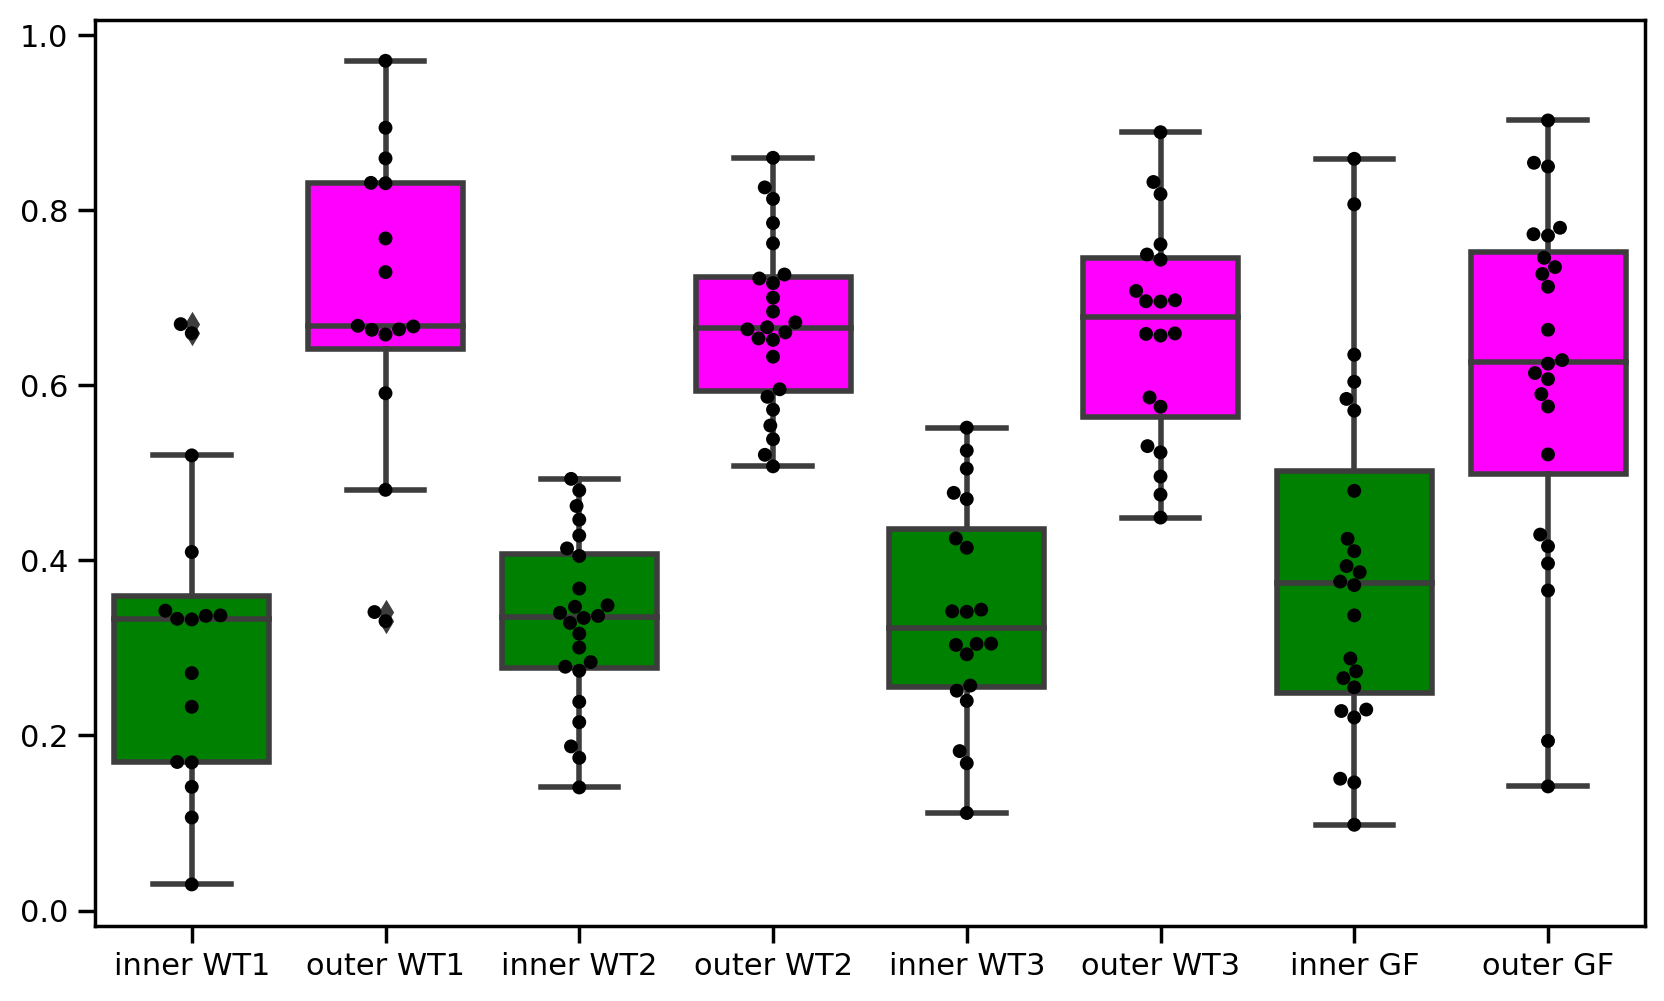

In [ ]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.0})
figure=plt.figure(figsize=(10,6),dpi=200)
# upper part to change the size
# to make a boxplot with data spots shown, add all the column names you want in
ax1 = sns.boxplot(data=AllProba[['inner WT1', 'outer WT1', 'inner WT2', 'outer WT2', 'inner WT3', 'outer WT3', 'inner GF', 'outer GF']])
ax2 = sns.swarmplot(data=AllProba[['inner WT1', 'outer WT1', 'inner WT2', 'outer WT2', 'inner WT3', 'outer WT3', 'inner GF', 'outer GF']], color = 'black')
colors = ['magenta', 'green']
boxes = ax1.artists
for i,box in enumerate(boxes):
  if i%2:
    box.set_facecolor('magenta')
  else:
    box.set_facecolor('green')


In [ ]:
# for saving
figure.savefig('Comparison_all_3pm.png')

In [ ]:
# to get the mean and median values
print(AllProba.mean())
print(AllProba.median())
# without print it only shows the last one

inner WT1    0.316200
outer WT1    0.683800
inner GF     0.391231
outer GF     0.608769
inner WT2    0.330722
outer WT2    0.669278
inner WT3    0.340352
outer WT3    0.659648
dtype: float32
inner WT1    0.332754
outer WT1    0.667246
inner GF     0.373600
outer GF     0.626400
inner WT2    0.335225
outer WT2    0.664775
inner WT3    0.322926
outer WT3    0.677075
dtype: float32


In [ ]:
# copy this for each file you want to look at
ProbabilityWT1 = pd.read_csv ('22-10-25_4dpf_wt11am_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner WT1',1:'outer WT1'})
ProbabilityGF = pd.read_csv ('22-11-01_4dpfGF_11am_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner GF',1:'outer GF'})
ProbabilityWT2 = pd.read_csv ('22-11-15_4dpf_wt11am-1_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner WT2',1:'outer WT2'})
ProbabilityWT3 = pd.read_csv ('22-11-15_4dpf_wt11am-2_probability.txt', sep=' ', header=None, dtype=np.float32).transpose().rename(columns={0:'inner WT3',1:'outer WT3'})



In [ ]:
# check if all will be shown next to each other
AllProba=pd.concat([ProbabilityWT1, ProbabilityWT2, ProbabilityWT3, ProbabilityGF],axis=1,join='inner')
AllProba.head()

,inner WT1,outer WT1,inner WT2,outer WT2,inner WT3,outer WT3,inner GF,outer GF
0,NaN,NaN,0.231862,0.768138,0.470788,0.529212,0.494896,0.505104
1,0.023987,0.976013,0.525485,0.474515,0.540482,0.459518,0.999166,0.000834
2,0.310320,0.689680,0.722687,0.277313,0.374882,0.625118,0.279698,0.720302
3,0.406456,0.593544,0.349820,0.650180,0.439858,0.560142,0.403609,0.596391
4,0.383565,0.616435,0.251900,0.748100,0.248957,0.751043,0.323274,0.676726


In [ ]:
# to remove values that equal 0 or 1
AllProba.replace(0, np.nan, inplace=True), AllProba.replace(1, np.nan, inplace=True)

(None, None)

In [ ]:
AllProba.to_excel('Comparison_all_11am.xlsx')

In [ ]:
ProbaDF=Probability2510
ProbaDF=ProbaDF.rename(columns={0:'inner WT',1:'outer WT'})
#Changes the name of the column for plotting, you can then concatenate two dataframes that you loaded from two separate files
#Example : AllProbabilities = [Probability2510,Probability2610]

ValueError: ignored

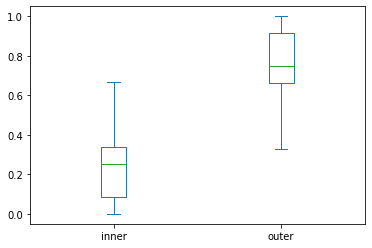

In [ ]:
ProbaDF.plot(kind='box')